# Trabalho 2
Alunos: João Pedro Banhato Pereira e Pedro de Araujo Bhering Bittencourt

**"A Parallel 2D Numerical Simulation of Tumor Cells Necrosis by Local Hyperthermia (sem Hipertermia)"**

https://iopscience.iop.org/article/10.1088/1742-6596/490/1/012138/pdf



##Relatório

####Modelo Inicial


-  Modelo de Biotransferência de Calor (Equação de Pennes)

\begin{equation}
\begin{cases}
\rho c \frac{\partial T_1(\vec{x}, t)}{\partial t} = \nabla \cdot k \nabla T_1(\vec{x}, t) + \omega_{b} \rho_b c_b (T_a - T_1(\vec{x}, t)) + Q_m(\vec{x}) + Q_r(\vec{x}, t),&\text{em } \Omega, t > 0 \\
\alpha T_1(\vec{x}, t) + \beta \nabla T_1(\vec{x}, t) \cdot \vec{n} = f(\vec{x}, t),& \text{em } \Gamma, t > 0 \\
T_1(\vec{x}, 0) = T_2(\vec{x}),& \text{em } \Omega
\end{cases}
\end{equation}

onde:

 $\rho$ é a densidade do tecido, $c$ o calor específico do tecido e $k$ a condutividade térmica do tecido;

 $c_b$ é o calor específico do sangue, $\rho_b$ a densidade do sangue, $\omega_b$ a taxa de perfusão do sangue e $T_a$ a temperatura arterial do sangue;

 $Q_m$ é a geração de calor metabólico, $T_1$ a temperatura do tecido, $Q_r$ o aquecimento externo (hipertermia) e $T_2$ a temperatura inicial, que no caso, pode ser considerada a temperatura arterial $T_a$.

#### Considerações para o trabalho da disciplina

Nesse caso, diferente do trabalho antereior, vamos considerar a função $T_1$ como sendo dependente de $\vec{x}$ e de $t$, já que tratamos de uma **EDP parabólica**, assim, ela ficará do mesmo formato conforme mostrado anteriormente.

Além disso, consideramos uma **condição inicial** em que a temperatura, no instante $0$, possui o valor de $Ta = 37 °C$

#### Modelos atingidos



Com isso, os modelos atingidos foram os seguintes:

Modelo sem hipertermia:

\begin{equation}
    \rho c \frac{\partial T_1(\vec{x}, t)}{\partial t} = \nabla \cdot k \nabla T_1(\vec{x}, t) + \omega_{b} \rho_b c_b (T_a - T_1(\vec{x}, t)) + Q_m(\vec{x})
\end{equation}

Modelo com hipertermia:

\begin{equation}
    \rho c \frac{\partial T_1(\vec{x}, t)}{\partial t} = \nabla \cdot k \nabla T_1(\vec{x}, t) + \omega_{b} \rho_b c_b (T_a - T_1(\vec{x}, t)) + Q_m(\vec{x}) + Q_r(\vec{x}, t)
\end{equation}

#### Discretização no tempo

Para realizarmos a discretização no tempo, vamos utilizar a **diferença progressiva**:

$$
\frac{T^{n+1}_1 - T^{n}_1}{h_t}
$$

#### Meio heterogêneo

Assim como no trabalho anterior, os valores de $k$ e $\omega_{b}$ variam de acordo com o meio (dentro ou fora do tumor), temos um meio heterogêneo, o que requer uma discretização da difusão do calor($\nabla \cdot k \nabla T_1(\vec{x})$) com **pontos fictícios** entre os pontos do domínio.


\begin{equation}
\nabla \cdot k \nabla T_1 = \nabla \left[k(x,y) \nabla T_1(x,y)\right]       
\end{equation}



No entanto, como agora há a discretização no tempo, será necessário denotar os valores dos $T's$ referentes ao tempo, para isso, utilizamos o índice $n$.

\begin{equation}
\begin{aligned}
\nabla \cdot k \nabla T_1^n \approx
\frac{1}{h_x^2} \left[k_{i-1/2,j} T^n_{1_{{i-1, j}}} - (k_{i-1/2,j} + k_{i+1/2,j}) T^n_{1_{{i,j}}} + k_{i+1/2,j} T^n_{1_{{i+1,j}}} \right] \\
+ \frac{1}{h_y^2} \left[k_{i,j - 1/2} T^n_{1_{{i, j-1}}} - (k_{i,j-1/2} + k_{i,j+1/2}) T^n_{1_{{i,j}}} + k_{i,j+1/2} T^n_{1_{{i,j+1}}} \right]
\end{aligned}
\end{equation}



com $k_{i+1/2,j} = \dfrac{2 k_{i,j}k_{i+1,j}}{k_{i,j} + k_{i+1,j}}$ e $k_{i,j+1/2} = \dfrac{2 k_{i,j}k_{i,j+1}}{k_{i,j} + k_{i,j+1}}$

Com isso, vamos considerar $h_x = h_y = h$ e, desse modo:

$$
\nabla \cdot k \nabla T^n_1 \approx \dfrac{1}{h^2} [k_{i-1/2,j} T^n_{1_{{i-1,j}}} + k_{i,j-1/2} T^n_{1_{{i,j-1}}} -\left( k_{i-1/2,j} + k_{i+1/2,j} + k_{i,j-1/2} + k_{i,j+1/2} \right)T^n_{1_{{i,j}}} +\\+ k_{i+1/2,j} T^n_{1_{{i+1,j}}} + k_{i,j+1/2} T^n_{1_{{i,j+1}}}]
$$



Para facilitar a análise, vamos chamar cada termo que multiplica cada $T^n_{1_{{i,j}}}$ de $q_{i,j}$:

$q_{i,j} = \left( k_{i-1/2,j} + k_{i+1/2,j} + k_{i,j-1/2} + k_{i,j+1/2} \right)$

$q_{i-1,j} = k_{i-1/2,j}$

$q_{i,j-1} = k_{i,j-1/2}$

$q_{i+1,j} = k_{i+1/2,j}$

$q_{i,j+1} = k_{i,j+1/2}$

Com isso, a simplificação fica da seguinte forma:

$$
\nabla \cdot k \nabla T^n_1 \approx \frac{1}{h^2}[q_{i-1,j} T^n_{1_{i-1, j}} + q_{i,j-1}T^n_{1_{i,j-1}} - q_{i,j}T^n_{1_{i,j}} + q_{i+1,j}T^n_{1_{i+1,j}} + q_{i,j+1}T^n_{1_{i,j+1}}]
$$

Dessa forma, basta agora substituirmos no modelo e isolar o termo $T^{n+1}_{1_{i,j}}$:

$$
\rho c \frac{T^{n+1}_{1_{i,j}} - T^{n}_{1_{i,j}}}{h_t} = \frac{(q_{i-1,j} T^n_{1_{i-1, j}} + q_{i,j-1}T^n_{1_{i,j-1}} - q_{i,j}T^n_{1_{i,j}} + q_{i+1,j}T^n_{1_{i+1,j}} + q_{i,j+1}T^n_{1_{i,j+1}})}{h^2} + \omega_{b} \rho_b c_b (T_a - T^n_{1_{i,j}}) + Q_{m_{i,j}} + {Q^n_{r_{i,j}}}
$$

$$
T^{n+1}_{1_{i,j}} - T^n_{1_{i,j}} = \frac{h_t}{h^2 \rho c}\left(q_{i-1,j} T^n_{1_{i-1, j}} + q_{i,j-1}T^n_{1_{i,j-1}} - q_{i,j}T^n_{1_{i,j}} + q_{i+1,j}T^n_{1_{i+1,j}} + q_{i,j+1}T^n_{1_{i,j+1}} + h^2 \omega_b \rho_b c_b T_a - h^2 \omega_b \rho_b c_b T^n_{1_{i,j}} + h^2Q_{m_{i,j}} + h^2{Q^n_{r_{i,j}}}\right)
$$

$$
T^{n+1}_{1_{i,j}} = \frac{h_t}{h^2 \rho c}\left(q_{i-1,j} T^n_{1_{i-1, j}} + q_{i,j-1}T^n_{1_{i,j-1}} - q_{i,j}T^n_{1_{i,j}} + q_{i+1,j}T^n_{1_{i+1,j}} + q_{i,j+1}T^n_{1_{i,j+1}} + h^2 \omega_b \rho_b c_b T_a - h^2 \omega_b \rho_b c_b T^n_{1_{i,j}} + h^2Q_{m_{i,j}} + h^2{Q^n_{r_{i,j}}}\right) + T^n_{1_{i,j}}
$$

**Ressaltamos que, para o trabalho sem hipertermia, a equação completa não possui o termo $Q_{r_{i,j}}$.**

#### Análises da evolução de temperaturas no tempo

Ademais algo a mais que foi implementado nesse trabalho, em relação ao anterior, é a análise da evolução da temperautra, em alguns determinados pontos, no tempo. Esses pontos são:

* $(x = 0.030, y = 0.050)$ -> Região fora do tumor (tecido saudável);
* $(x = 0.045, y = 0.050)$ -> Região dentro do tumor

Esses pontos foram analisados no artigo, portanto o experimento foi repetido a fim de podermos analisar e comparar os resultados.

#### Análise de estabilidade

Para que o método seja estável, é necessário que a seguinte restrição seja garantida:

$$
\dfrac{\kappa h_t}{\rho c} \left(\frac{1}{h_x^2} + \frac{1}{h_y^2}\right) \leq \frac{1}{2}
$$

Como, $h_x = h_y = h$:

$$
\dfrac{\kappa h_t}{\rho c} \left(\frac{2}{h^2}\right) \leq \frac{1}{2}
$$

Assim:

$$
\dfrac{\kappa}{\rho c} \left(\frac{h_t}{h^2}\right) \leq \frac{1}{4}
$$

Como o problema envolve um meio heterogêneo, devemos usar valor de $\kappa$ que representa o pior caso, ou seja, o maior valor que no caso é 0.55. Então:

$$
\frac{h_t}{h^2} \leq \frac{\rho c}{4\times0.55}
$$

$$
\frac{h_t}{h^2} \leq 1.91 \times 10^6
$$

Desse modo, os valores de $h_t$ e $h$ devem respeitar essa condição. No entanto, percebe-se que para um valor de $h$ como $10^{-3}$ o valor de $h_t$ necessário para respeitar essa condição é de 1.91. O que indica que a condição de estabilidade é cumprida com uma discretização no tempo pouco restrita.

Isso se deve ao fato de alguns fatores possuírem valores de ordem mais alta ($\rho$ e $c$). Mesmo assim, como o valor de $h$ escolhido para esse trabalho é de $10^{-3}$, decidimos utilizar um valor de $h_t$ da mesma ordem. Além disso, o tempo de simulação foi de 3000 segundos.

#### Parâmetros:



$h_x = h_y = h = 10^{-3}$

$h_t = 10^{-3}$

$t = 3000s$

$\rho = 1 \times10^3 \, \text{Kg/m}^3$

$c = 4.2\times10^3 \, \text{J/Kg}^\circ \text{C}$

$\rho_b = 1 \times10^3 \, \text{Kg/m}^3$

$c_b = 4.2\times10^3 \, \text{J/Kg}^\circ \text{C}$

$T_a = 37^\circ \text{C}$

$
k =
\begin{cases}
 0.5 \, \text{W/m} ^\circ C, & \text{(Normal)} \\
0.55 \, \text{W/m} ^\circ C, & \text{(Tumor)}
\end{cases}
$

$
\omega_b =
\begin{cases}
5\times10^{-4} \, \text{s}^{-1}, & \text{(Normal)} \\
1.25\times10^{-3} \, \text{s}^{-1}, & \text{(Tumor)}
\end{cases}
$

$
Q_m =
\begin{cases}
400 \, \text{W/m}^3, & \text{(Normal)} \\
1000 \, \text{W/m}^3, & \text{(Tumor)}
\end{cases}
$

#### Domínio

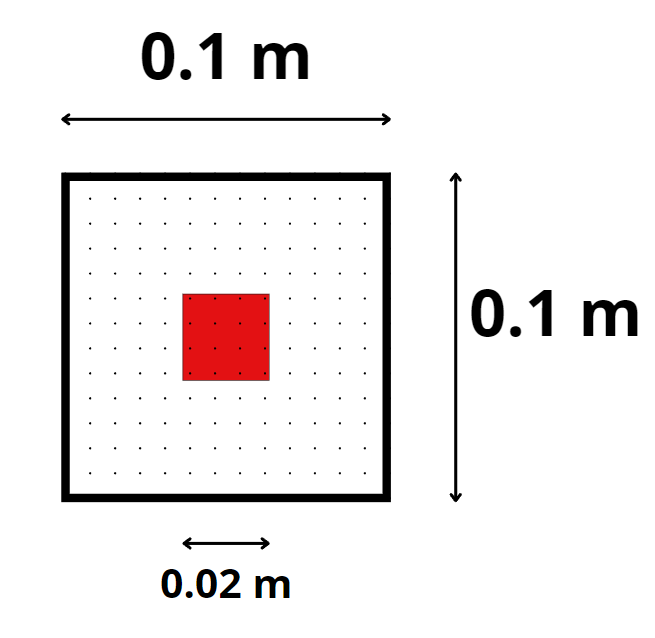

Consideramos uma condição de contorno de Dirichlet na parede esquerda da célula e Neumann com fluxo nulo para as outras paredes. Além disso, fizemos implementações apenas na linguagem C++, diferente do útlimo trabalho. Isso porque, como esse trabalho possui maior número de operações, optamos por manter apenas a linguagem C++ por possuir maior velocidade de execução.

Com isso, logo a seguir, são apresentados os 2 códigos desenvolvidos para os problemas apresentados.

##Implementação

###Parte sem hipertermia

- Resolver a Eq. (1) sem o termo Qr e sem a derivada em relação ao tempo
- Incluir uma motivação e contextualização do tema
- Incluir conclusões sobre o estudo realizado"

In [ ]:
%%writefile main.cpp
#include <iostream>
#include <vector>
#include <cmath>
#include <ctime>
#include <algorithm>
#include <fstream>
#include <filesystem>

using namespace std;
namespace fs = filesystem;

const double h = 1e-3; //discretização no espaço
const double ht = 1e-3; //discretização no tempo
const double x_size = 0.1;
const double y_size = 0.1;
const int t_max = 3000; //tempo de simulação

// Função para usar range
vector<double> create_range(double start, double end, double step) {
    vector<double> range;
    for (double val = start; val <= end; val += step) {
        range.push_back(val);
    }
    return range;
}

// Define se o ponto (x, y) é do tumor
bool tumor(double x, double y) {
    return (0.04 <= x && x <= 0.06 && 0.04 <= y && y <= 0.06);
}

// 3 Funções para parâmetros dependentes do tumor
double k(double x, double y) {
    return tumor(x, y) ? 0.55 : 0.5;
}

double w_b(double x, double y) {
    return tumor(x, y) ? 1.25e-3 : 5e-4;
}

double Q_m(double x, double y) {
    return tumor(x, y) ? 4200 : 420;
}

// 2 Funções para meio heterogêneo
double harmonica_j(int i, const vector<double>& x, int j, const vector<double>& y) {
    if (j + 1 >= x.size())
        return k(x[j], y[i]);
    return (2 * k(x[j], y[i]) * k(x[j + 1], y[i])) / (k(x[j], y[i]) + k(x[j + 1], y[i]));
}

double harmonica_i(int i, const vector<double>& x, int j, const vector<double>& y) {
    if (i + 1 >= y.size())
        return k(x[j], y[i]);
    return (2 * k(x[j], y[i]) * k(x[j], y[i + 1])) / (k(x[j], y[i]) + k(x[j], y[i + 1]));
}

int main() {
    // Vetores de espaço e tempo
    vector<double> x = create_range(0, x_size + h/2, h);
    vector<double> y = create_range(0, y_size + h/2, h);
    vector<double> t = create_range(0, t_max + ht, ht);

    // Parâmetros do meio
    const double p = 1e3;
    const double c = 4.2e3;

    // Parâmetros do sangue
    const double p_b = 1e3;
    const double c_b = 4.2e3;
    const double Ta = 37;

    int M = x.size();
    int T_it = t.size();

    // Condição inicial: T(t=0) = Ta
    vector<vector<double>> T(M, vector<double>(M, Ta));
    vector<vector<double>> T_new(M, vector<double>(M, 0));

    string caminho = "binary/"; // guarda para plot de tempo
    // Criar a pasta caso não exista
    if (!fs::exists(caminho)) {
        fs::create_directory(caminho);
    }

    // Loop
    clock_t start_time = clock();
    for (int k = 0; k < T_it; ++k) {
        for (int i = 0; i < M; ++i) { // eixo y (cresce para cima)
            for (int j = 0; j < M; ++j) { // eixo y (cresce para direita)
                // Condições de Contorno
                if (i == 0) {                 // Condição Neumann em d (lado de baixo)
                    T_new[i][j] = T[1][j];
                } else if (i == M - 1) {      // Condição Neumann em b (lado de cima)
                    T_new[i][j] = T[M - 2][j];
                } else if (j == 0) {          // Condição Dirichlet em a (lado esquerdo)
                    T_new[i][j] = Ta;
                } else if (j == M - 1) {      // Condição Neumann em c (lado direito)
                    T_new[i][j] = T[i][M - 2];
                } else {                      // Pontos internos da matriz
                    double Tija = T[i][j - 1];
                    double Tijb = T[i + 1][j];
                    double Tijc = T[i][j + 1];
                    double Tijd = T[i - 1][j];

                    double qija = harmonica_i(i, x, j, y);
                    double qijb = harmonica_j(i, x, j + 1, y);
                    double qijc = harmonica_i(i + 1, x, j, y);
                    double qijd = harmonica_j(i, x, j, y);
                    double qij = qija + qijb + qijc + qijd;

                    T_new[i][j] = ht / (h * h * p * c) * (
                        (qija * Tija + qijb * Tijb - qij * T[i][j] + qijc * Tijc + qijd * Tijd) +
                        h * h * w_b(x[j], y[i]) * p_b * c_b * Ta -
                        h * h * w_b(x[j], y[i]) * p_b * c_b * T[i][j] +
                        h * h * (Q_m(x[j], y[i]))
                    ) + T[i][j];

                }
            }
        }
        T = T_new;

        // para plot no tempo
        if ((k / ((int)(1 / ht))) % 50 == 0) { // a cada 100 segundos
            string filename = caminho + "binary_" + to_string(k / ((int)(1 / ht))) + ".bin";
            ofstream binFile(filename, ios::binary);
            if (!binFile) {
                cerr << "Erro ao abrir " << filename << " para escrita." << endl;
                return 1;
            }
            for (const auto& row : T) {
                binFile.write(reinterpret_cast<const char*>(row.data()), row.size() * sizeof(double));
            }
            binFile.close();
          }

    }
    clock_t end_time = clock();

    double elapsed_time = double(end_time - start_time) / CLOCKS_PER_SEC;
    cout << "Tempo: " << elapsed_time << " segundos" << endl;

    // Salvar temperatura em arquivo para plots sem variacao de tempo:
    ofstream outFile("Temp.txt");
    if (!outFile) {
        cerr << "Erro ao abrir o arquivo para escrita." << endl;
        return 1;
    }
    for (const auto& row : T) {
        for (const auto& value : row) {
            outFile << value << " ";
        }
        outFile << endl;
    }
    outFile.close();

    return 0;
}

Overwriting main.cpp


In [ ]:
!g++ main.cpp -o main -Ofast
!./main

Tempo: 894.086 segundos


#### Plots

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from google.colab import files
import numpy as np
import os
import matplotlib.animation as animation
from IPython.display import HTML, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

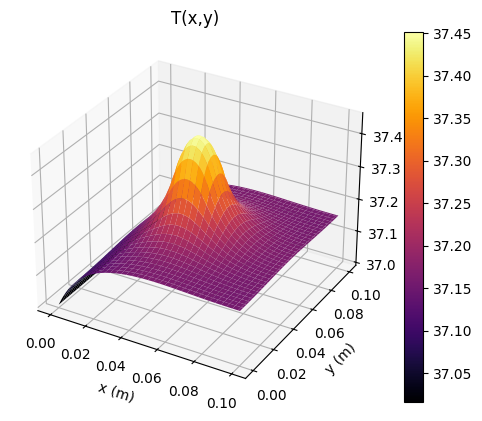

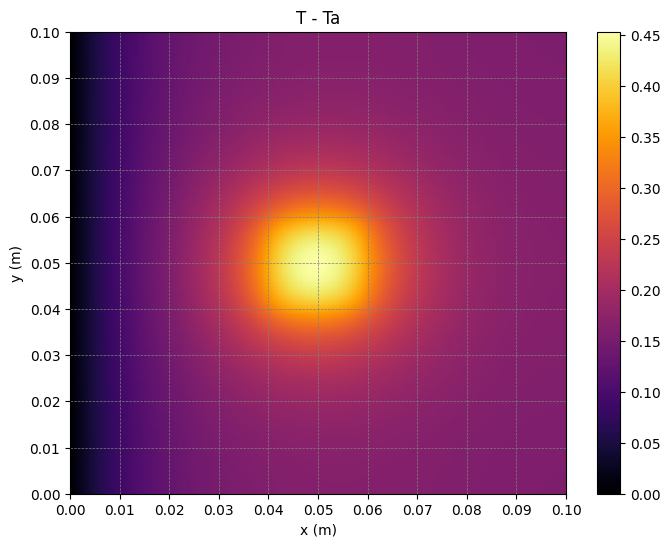

In [ ]:
dataset = np.loadtxt('Temp.txt')

h = 1e-3
x = np.arange(0, 0.1 + h, h)
y = np.arange(0, 0.1 + h, h)

# Plot
conf_matrix_df = pd.DataFrame(dataset, columns=x, index=y)
X, Y = np.meshgrid(x, y)

Ta = 37
T = dataset

# Plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, T, cmap='inferno')
plt.colorbar(surface)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.title('T(x,y)')
plt.show()

# Plot 2D
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, T - Ta, cmap='inferno', shading='gouraud')
cb = plt.colorbar(c)
cb.locator = ticker.MaxNLocator(integer=True)
plt.xticks(np.arange(X.min(), X.max() + 0.01, 0.01))
plt.yticks(np.arange(Y.min(), Y.max() + 0.01, 0.01))
plt.grid(visible=True, which='both', color='gray', linestyle='--', linewidth=0.5)
cb.update_ticks()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('T - Ta')
plt.show()

#### Animações

In [ ]:
folderbin = "/content/binary"

h = 1e-3
x = np.arange(0, 0.1 + h/2, h)
y = np.arange(0, 0.1 + h/2, h)
X, Y = np.meshgrid(x, y)

Ta = 37
T_max = T.max()
T_diff = T_max - Ta

# Recupera valores do binário
def read_matrix(filename, rows, cols, dtype=np.float64):
    with open(filename, "rb") as f:
        data = np.fromfile(f, dtype=dtype)
    return data.reshape((rows, cols))

# Ordena
bin_files = sorted([f for f in os.listdir(folderbin) if f.endswith(".bin")],
                   key=lambda x: int(x.split("_")[-1].split(".")[0]))

first_matrix = read_matrix(os.path.join(folderbin, bin_files[0]), len(y), len(x))
rows, cols = first_matrix.shape

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.pcolormesh(X, Y, first_matrix - Ta, cmap='inferno', shading='gouraud', vmin=0, vmax=T_diff)
cb = plt.colorbar(im)
cb.locator = ticker.MaxNLocator(integer=True)
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_title("T - Ta (t = 0 s)")
ax.set_xticks(np.arange(X.min(), X.max() + 0.01, 0.01))
ax.set_yticks(np.arange(Y.min(), Y.max() + 0.01, 0.01))
ax.grid(visible=True, which="both", color="gray", linestyle="--", linewidth=0.5)
cb.update_ticks()

# Animação
def update(frame):
    matrix = read_matrix(os.path.join(folderbin, bin_files[frame]), rows, cols)
    im.set_array(matrix.ravel() - Ta)
    ax.set_title(f"T - Ta (t = {bin_files[frame].split('_')[-1].split('.')[0]}s)")
    return [im]

ani = animation.FuncAnimation(fig, update, frames=len(bin_files), interval=100)
plt.close(fig)
HTML(ani.to_html5_video())

In [ ]:
folderbin = "/content/binary"

h = 1e-3
x = np.arange(0, 0.1 + h/2, h)
y = np.arange(0, 0.1 + h/2, h)
X, Y = np.meshgrid(x, y)

Ta = 37
T_max = T.max()

# Recupera valores do binário
def read_matrix(filename, rows, cols, dtype=np.float64):
    with open(filename, "rb") as f:
        data = np.fromfile(f, dtype=dtype)
    return data.reshape((rows, cols))

# Ordena
bin_files = sorted([f for f in os.listdir(folderbin) if f.endswith(".bin")],
                   key=lambda x: int(x.split("_")[-1].split(".")[0]))

first_matrix = read_matrix(os.path.join(folderbin, bin_files[0]), len(y), len(x))
rows, cols = first_matrix.shape

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(X, Y, first_matrix, cmap='inferno', vmin=Ta, vmax=T_max)
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("Temperatura (°C)")
ax.set_title("T (t = 0s)")

# Animação
def update(frame):
    matrix = read_matrix(os.path.join(folderbin, bin_files[frame]), rows, cols)

    ax.clear()  #Limpa a figura para redesenhar
    surface = ax.plot_surface(X, Y, matrix, cmap='inferno', vmin=Ta, vmax=T_max)
    ax.set_xlabel("x (m)")
    ax.set_ylabel("y (m)")
    ax.set_zlim(Ta, T_max)
    ax.set_title(f"T (t = {bin_files[frame].split('_')[-1].split('.')[0]}s)")

    return [surface]

ani = animation.FuncAnimation(fig, update, frames=len(bin_files), interval=100)
plt.close(fig)
HTML(ani.to_html5_video())

###Parte com hipertermia

- Resolver a Eq. (1) com o termo Qr e sem a derivada em relação ao tempo
- Incluir uma motivação e contextualização do tema
- Incluir conclusões sobre o estudo realizado

####Código prinicipal

In [ ]:
%%writefile main.cpp
#include <iostream>
#include <vector>
#include <cmath>
#include <ctime>
#include <algorithm>
#include <fstream>
#include <filesystem>

using namespace std;
namespace fs = filesystem;

const double h = 1e-3;
const double ht = 1e-3;
const double x_size = 0.1;
const double y_size = 0.1;
const int t_max = 3000;  //tempo máximo em segundos

vector<double> create_range(double start, double end, double step) {
    vector<double> range;
    for (double val = start; val <= end; val += step) {
        range.push_back(val);
    }
    return range;
}

bool tumor(double x, double y) {
    return (0.04 <= x && x <= 0.06 && 0.04 <= y && y <= 0.06);
}

double k(double x, double y) {
    return tumor(x, y) ? 0.55 : 0.5;
}

double w_b(double x, double y) {
    return tumor(x, y) ? 1.25e-3 : 5e-4;
}

double Q_m(double x, double y) {
    return tumor(x, y) ? 4200 : 420;
}

double Q_r(const vector<double>& xi, const vector<double>& yi, double x, double y, int n) {
    const double r_o = 3.1e-3;
    const double A = 1.3e6 / n;
    double Qr = 0;

    for (int site = 0; site < n; ++site) {
        double r = sqrt(pow(x - xi[site], 2) + pow(y - yi[site], 2));
        Qr += A * exp(-pow(r / r_o, 2));
    }
    return Qr;
}

double harmonica_j(int i, const vector<double>& x, int j, const vector<double>& y) {
    if (j + 1 >= x.size())
        return k(x[j], y[i]);
    return (2 * k(x[j], y[i]) * k(x[j + 1], y[i])) / (k(x[j], y[i]) + k(x[j + 1], y[i]));
}

double harmonica_i(int i, const vector<double>& x, int j, const vector<double>& y) {
    if (i + 1 >= y.size())
        return k(x[j], y[i]);
    return (2 * k(x[j], y[i]) * k(x[j], y[i + 1])) / (k(x[j], y[i]) + k(x[j], y[i + 1]));
}

int main() {

    // string folderpath = "Hip_time_1s/"; //Nome da pasta onde os arquivos binários serão salvos
    string folderpath = "Hip_time_4s/"; //Nome da pasta onde os arquivos binários serão salvos

    // Criar a pasta caso não exista
    if (!fs::exists(folderpath)) {
        fs::create_directory(folderpath);
    }

    //Criação dos vetores de pontos espaciais e temporais
    vector<double> x = create_range(0, x_size + h/2, h);
    vector<double> y = create_range(0, y_size + h/2, h);
    vector<double> t = create_range(0, t_max + ht, ht);

    //constantes do tecido
    const double p = 1e3;
    const double c = 4.2e3;

    //constantes do sangue
    const double p_b = 1e3;
    const double c_b = 4.2e3;
    const double Ta = 37;

    int M = x.size();
    int T_it = t.size();

    vector<vector<double>> T(M, vector<double>(M, Ta)); //Condição inicial: T = Ta
    vector<vector<double>> T_new(M, vector<double>(M, 0));

    //Abrir arquivo para salvar evolução temporal da temperatura em pontos específicos
    // ofstream timeFile("Hip_time_1s.txt"); //Salva as temperaturas nos pontos específicos para o caso de 1 local de injeção
    ofstream timeFile("Hip_time_4s.txt"); //Salva as temperaturas nos pontos específicos para o caso de 4 locais de injeção
    if (!timeFile) {
        cerr << "Erro ao abrir arquivo para escrita." << endl;
        return 1;
    }
    //Escreve cabeçalho: tempo (s), T no tecido saudável e T no tumor
    timeFile << "Tempo(s) T_health T_tumor" << "\n";

    //Determinar os índices dos pontos de interesse:
    //Para (x = 0.030, y = 0.050)
    //Para (x = 0.045, y = 0.050)
    int index_y_health = 0.05 / h;      //y = 0.050 (fora do tumor)
    int index_y_tumor = 0.05 / h;      //y = 0.050 (dentro do tumor)
    int index_x_health = 0.03 / h;  //x = 0.030 (fora do tumor)
    int index_x_tumor  = 0.045 / h;  //x = 0.045 (dentro do tumor)

    //Salvar condição inicial (tempo = 0)
    timeFile << 0 << " " << T[index_y_health][index_x_health] - Ta << " " << T[index_y_tumor][index_x_tumor] - Ta << "\n";

    clock_t start_time = clock();

    //Loop temporal
    for (int k = 0; k < T_it; ++k) {
        for (int i = 0; i < M; ++i) {
            for (int j = 0; j < M; ++j) {
                if (i == 0) {
                    T_new[i][j] = T[1][j];
                } else if (i == M - 1) {
                    T_new[i][j] = T[M - 2][j];
                } else if (j == 0) {
                    T_new[i][j] = Ta;
                } else if (j == M - 1) {
                    T_new[i][j] = T[i][M - 2];
                } else {
                    double Tija = T[i][j - 1];
                    double Tijb = T[i + 1][j];
                    double Tijc = T[i][j + 1];
                    double Tijd = T[i - 1][j];

                    double qija = harmonica_i(i, x, j, y);
                    double qijb = harmonica_j(i, x, j + 1, y);
                    double qijc = harmonica_i(i + 1, x, j, y);
                    double qijd = harmonica_j(i, x, j, y);
                    double qij = qija + qijb + qijc + qijd;

                    // T_new[i][j] = ht / (h * h * p * c) * (
                    //     (qija * Tija + qijb * Tijb - qij * T[i][j] + qijc * Tijc + qijd * Tijd) +
                    //     h * h * w_b(x[j], y[i]) * p_b * c_b * Ta -
                    //     h * h * w_b(x[j], y[i]) * p_b * c_b * T[i][j] +
                    //     h * h * (Q_m(x[j], y[i]) + Q_r({0.05}, {0.05}, x[j], y[i], 1))
                    // ) + T[i][j]; //1 local de injeção

                    T_new[i][j] = (ht / (h * h * p * c)) * (
                        (qija * Tija + qijb * Tijb - qij * T[i][j] + qijc * Tijc + qijd * Tijd) +
                        h * h * w_b(x[j], y[i]) * p_b * c_b * Ta -
                        h * h * w_b(x[j], y[i]) * p_b * c_b * T[i][j] +
                        h * h * (Q_m(x[j], y[i]) + Q_r({0.045, 0.045, 0.055, 0.055}, {0.055, 0.045, 0.045, 0.055}, x[j], y[i], 4))
                    ) + T[i][j]; //4 locais de injeção

                }
            }
        }
        T = T_new;  //Atualiza a solução para o próximo instante

        //Registrar a evolução temporal dos pontos de interesse
        double current_time = (k + 1) * ht; //tempo atual (em segundos)
        timeFile << current_time << " "
                 << T[index_y_health][index_x_health] - Ta << " "
                 << T[index_y_tumor][index_x_tumor] - Ta << "\n";

        // if ((k / ((int)(1 / ht))) % 10 == 0) { //Salva as temperaturas de 10 em 10 segundos (tempo real, mas animação fica um pouco demorada)
          if ((k / ((int)(1 / ht))) % 50 == 0) { //Salva as temperaturas de 100 em 100 segundos (tempo real, mas animação fica um pouco demorada)
            string filename = folderpath + "Hip_time_1s_" + to_string(k / ((int)(1 / ht))) + ".bin";
            ofstream binFile(filename, ios::binary);
            if (!binFile) {
                cerr << "Erro ao abrir " << filename << " para escrita." << endl;
                return 1;
            }

            for (const auto& row : T) {
                binFile.write(reinterpret_cast<const char*>(row.data()), row.size() * sizeof(double));
            }

            binFile.close();
          }
    }

    timeFile.close();

    //Verificação de necrose usando a última solução
    vector<vector<double>> T_last = T;
    double tumor_total = 0;
    double tumor_com_necro = 0;
    double tecido_total = 0;
    double tecido_necro = 0;

    for (int i = 0; i < M; ++i) {
        for (int j = 0; j < M; ++j) {
            if (tumor(x[j], y[i])) {
                tumor_total += 1;
                if (T_last[i][j] > 43) {
                    tumor_com_necro += 1;
                }
            } else {
                tecido_total += 1;
                if (T_last[i][j] > 43) {
                    tecido_necro += 1;
                }
            }
        }
    }

    double tumor_necro = tumor_com_necro / tumor_total;
    double tecido_necro_perc = tecido_necro / tecido_total;

    cout << "Porcentagem de necrose no tumor: " << tumor_necro * 100 << "%" << endl;
    cout << "Porcentagem de necrose no tecido saudável: " << tecido_necro_perc * 100 << "%" << endl;

    clock_t end_time = clock();
    double elapsed_time = double(end_time - start_time) / CLOCKS_PER_SEC;
    cout << "Tempo: " << elapsed_time << " segundos" << endl;

    //Escrita da matriz final (T_last) no arquivo Hip.txt
    ofstream outFile("Hip.txt");
    if (!outFile) {
        cerr << "Erro ao abrir o arquivo para escrita." << endl;
        return 1;
    }
    for (const auto& row : T_last) {
        for (const auto& value : row) {
            outFile << value << " ";
        }
        outFile << endl;
    }
    outFile.close();

    return 0;
}

Writing main.cpp


In [ ]:
!g++ main.cpp -o main -Ofast
!./main

Porcentagem de necrose no tumor: 92.75%
Porcentagem de necrose no tecido saudável: 0.244873%
Tempo: 4179.74 segundos


####Bibliotecas Python

In [ ]:
#Bibliotecas para plotar os gráficos e realizar algumas operações
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from google.colab import files
from IPython.display import HTML, Image
import matplotlib.animation as animation
import os
import numpy as np

####Gif Gráfico 2D

In [ ]:
# folderbin = "/content/Hip_time_1s"
folderbin = "/content/Hip_time_4s"

h = 1e-3  #Espaçamento da grade
x = np.arange(0, 0.1 + h/2, h)
y = np.arange(0, 0.1 + h/2, h)
X, Y = np.meshgrid(x, y)

Ta = 37
# T_max = 55.78 #Temperatura máxima para o caso de 1 local de injeção
T_max = 45.8149 #Temperatura máxima para o caso de 4 locais de injeção

T_diff = T_max - Ta

#Função para ler matriz de um arquivo binário
def read_matrix(filename, rows, cols, dtype=np.float64):
    """Lê uma matriz salva em binário e a retorna como um array NumPy."""
    with open(filename, "rb") as f:
        data = np.fromfile(f, dtype=dtype)
    return data.reshape((rows, cols))

#Listar e ordenar arquivos binários pelo tempo
bin_files = sorted([f for f in os.listdir(folderbin) if f.endswith(".bin")],
                   key=lambda x: int(x.split("_")[-1].split(".")[0]))

#Definir tamanho da matriz com base no primeiro arquivo
first_matrix = read_matrix(os.path.join(folderbin, bin_files[0]), len(y), len(x))
rows, cols = first_matrix.shape

#Criar a figura
fig, ax = plt.subplots(figsize=(8, 6))
#Remove slicing to match X and Y shapes
im = ax.pcolormesh(X, Y, first_matrix - Ta, cmap='inferno', shading='gouraud', vmin=0, vmax=T_diff)
cb = plt.colorbar(im)
cb.locator = ticker.MaxNLocator(integer=True)

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_title("T - Ta (t = 0 s)")

ax.set_xticks(np.arange(X.min(), X.max() + 0.01, 0.01))
ax.set_yticks(np.arange(Y.min(), Y.max() + 0.01, 0.01))
ax.grid(visible=True, which="both", color="gray", linestyle="--", linewidth=0.5)
cb.update_ticks()

#Função de atualização para animação
def update(frame):
    matrix = read_matrix(os.path.join(folderbin, bin_files[frame]), rows, cols)

    im.set_array(matrix.ravel() - Ta)
    ax.set_title(f"T - Ta (t = {bin_files[frame].split('_')[-1].split('.')[0]}s)")
    return [im]

#Criando a animação
ani = animation.FuncAnimation(fig, update, frames=len(bin_files), interval=100)
plt.close(fig)

HTML(ani.to_html5_video())

####Gif Gráfico 3D

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import HTML

# folderbin = "/content/Hip_time_1s"
folderbin = "/content/Hip_time_4s"

h = 1e-3  #Espaçamento da grade
x = np.arange(0, 0.1 + h/2, h)
y = np.arange(0, 0.1 + h/2, h)
X, Y = np.meshgrid(x, y)

#Temperatura arterial
Ta = 37
# T_max = 55.78  #Temperatura máxima para o caso de 1 local de injeção
T_max = 45.8149 #Temperatura máxima para o caso de 4 locais de injeção

#Função para ler matriz de um arquivo binário
def read_matrix(filename, rows, cols, dtype=np.float64):
    """Lê uma matriz salva em binário e a retorna como um array NumPy."""
    with open(filename, "rb") as f:
        data = np.fromfile(f, dtype=dtype)
    return data.reshape((rows, cols))

#Listar e ordenar arquivos binários pelo tempo
bin_files = sorted([f for f in os.listdir(folderbin) if f.endswith(".bin")],
                   key=lambda x: int(x.split("_")[-1].split(".")[0]))

#Definir tamanho da matriz com base no primeiro arquivo
first_matrix = read_matrix(os.path.join(folderbin, bin_files[0]), len(y), len(x))
rows, cols = first_matrix.shape

#Criar a figura
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

#Criar a superfície inicial
surface = ax.plot_surface(X, Y, first_matrix, cmap='inferno', vmin=Ta, vmax=T_max)

#Adicionar barra de cores
plt.colorbar(surface)


ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("Temperatura (°C)")
ax.set_title("T (t = 0s)")

#Função de atualização para animação
def update(frame):
    matrix = read_matrix(os.path.join(folderbin, bin_files[frame]), rows, cols)

    ax.clear()  #Limpa a figura para redesenhar
    surface = ax.plot_surface(X, Y, matrix, cmap='inferno', vmin=Ta, vmax=T_max)
    ax.set_xlabel("x (m)")
    ax.set_ylabel("y (m)")
    ax.set_zlim(Ta, T_max)
    ax.set_title(f"T (t = {bin_files[frame].split('_')[-1].split('.')[0]}s)")

    return [surface]

#Criando a animação
ani = animation.FuncAnimation(fig, update, frames=len(bin_files), interval=100)

plt.close(fig)

HTML(ani.to_html5_video())

####Gráficos da temperatura no último instante

45.8149


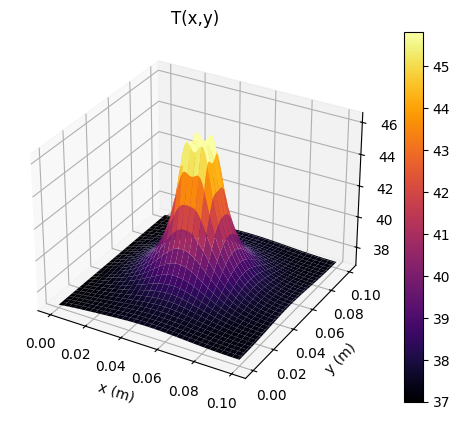

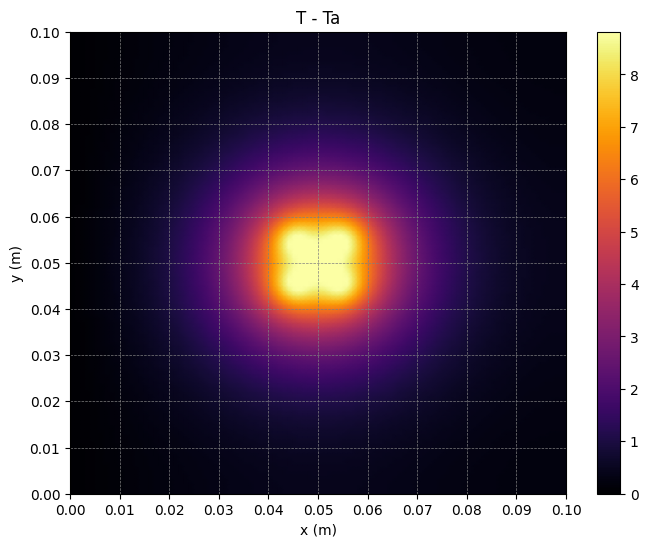

In [ ]:
#Carregar dataset
dataset = np.loadtxt('Hip.txt')

h = 1e-3

#Criar grade de valores x e y
x = np.arange(0, 0.1 + h/2, h)
y = np.arange(0, 0.1 + h/2, h)

#Criar DataFrame para o heatmap
conf_matrix_df = pd.DataFrame(dataset, columns=x, index=y)

#Criar meshgrid para plotagem 3D
X, Y = np.meshgrid(x, y)

Ta = 37

T = dataset

# T_max = T[int(0.1 / (2*h)) - 1, int(0.1 / (2*h)) - 1] #Temperatura máxima para o caso de 1 local de injeção
T_max = T[44, 54] #Temperatura máxima para o caso de 4 locais de injeção (localizada em um dos pontos de injeção)
print(T_max)
T_diff = T_max - Ta

#Plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(X, Y, T, cmap='inferno', vmin=Ta, vmax=T_max)
plt.colorbar(surface)

plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.title('T(x,y)')
plt.show()

#Plot 2D
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, T - Ta, cmap='inferno', shading='gouraud', vmin=0, vmax=T_diff)
cb = plt.colorbar(c)
cb.locator = ticker.MaxNLocator(integer=True)

plt.xticks(np.arange(X.min(), X.max() + 0.01, 0.01))
plt.yticks(np.arange(Y.min(), Y.max() + 0.01, 0.01))

plt.grid(visible=True, which='both', color='gray', linestyle='--', linewidth=0.5)
cb.update_ticks()

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('T - Ta')

plt.show()

####Gráficos das evoluções das temperaturas em determinados pontos no tempo.

Os pontos observados por aqui foram os mesmos observados no artigo, como dito no relatório, e são eles:

* $(x = 0.030, y = 0.050)$ -> Região fora do tumor (tecido saudável);
* $(x = 0.045, y = 0.050)$ -> Região dentro do tumor.

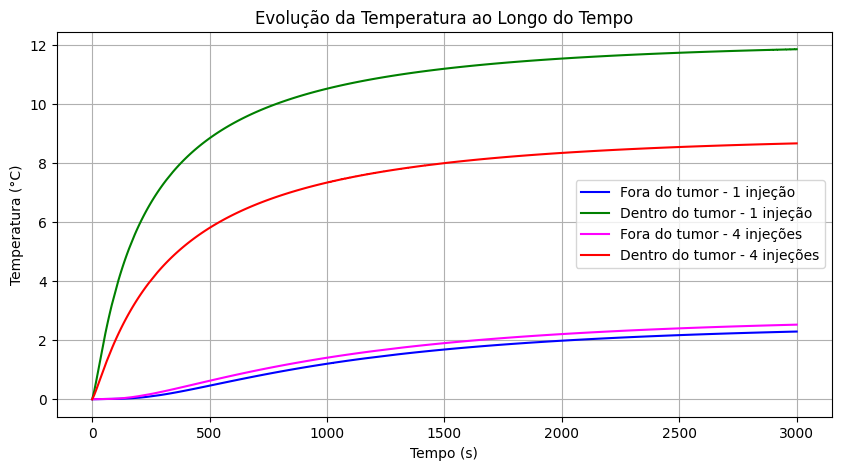

In [ ]:
#Verifique para qual caso (1 local ou 4 locais de injeção) você executou as células acima, caso tenha executado somente para um caso
#comente as célula relacionadas ao outro caso.
#Se executou para os dois casos, pode executar a célula completa

data_1s = np.loadtxt('Hip_time_1s.txt', skiprows=1)
time = data_1s[:, 0]    #Tempo em segundos
T_health_1s = data_1s[:, 1]   #Temperatura em (0.030, 0.050) – fora do tumor
T_tumor_1s = data_1s[:, 2]    #Temperatura em (0.045, 0.050) – dentro do tumor

data_4s = np.loadtxt('Hip_time_4s.txt', skiprows=1)
time = data_4s[:, 0]    #Tempo em segundos
T_health_4s = data_4s[:, 1]   #Temperatura em (0.030, 0.050) – fora do tumor
T_tumor_4s = data_4s[:, 2]    #Temperatura em (0.045, 0.050) – dentro do tumor

plt.figure(figsize=(10,5))
plt.plot(time, T_health_1s, label="Fora do tumor - 1 injeção", linestyle='-', color='blue')
plt.plot(time, T_tumor_1s, label="Dentro do tumor - 1 injeção", linestyle='-', color='green')
plt.plot(time, T_health_4s, label="Fora do tumor - 4 injeções", linestyle='-', color='magenta')
plt.plot(time, T_tumor_4s, label="Dentro do tumor - 4 injeções", linestyle='-', color='red')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.legend(loc='best')
plt.grid()
plt.title('Evolução da Temperatura ao Longo do Tempo')
plt.show()

##Conclusão

Por meio deste trabalho, foi possível analisar a biotransferência de calor no tecido tumoral e avaliar a eficiência do processo de necrose induzido pelo aumento da temperatura. A implementação, por meio da linguagem C++, se mostou eficaz, com desempenho aceitável, mesmo em execução serial, para alguns valores de $h_t$ como $0.1$. No entanto, para valores bem menores como $h_t = 0.001$, a execução serial apresentou uma demora mais considerável e, por isso, o uso da paralelização se torna interessante.

Os resultados encontrados indicaram que a geração de calor metabólico (Qm) representa a região de temperatura, ou seja, a identificação do tumor. Ademais, a aplicação de calor externo (Qr) pela hipertermia foi essencial para atingir a temperatura necessária à necrose das células tumorais. A discretização dos modelos tem um impacto de extrema importância nos resultados e, além disso, foi possível perceber que a solução apresentou uma convergência relativamente rápida na temperatura, visto que a taxa de mudança de temperatura a partir de valores próximos a 1500s começa a diminuir e a mudança de temperatura fica mais baixa. Comparando os resultados obtidos neste trabalho com os resultados obtidos no trabalho anterior e neste trabalho, percebe-se que o valores de necroses do tumor foram próximos, o que valida a abordagem utilizada. Os valores podem ser observados pela tabela a seguir:

$$
\begin{array}{|c|c|c|c|c|c|c|}
    \hline
    & \textbf{Trab 1 - 1L} & \textbf{Trab 1 - 4L} & \textbf{Trab 2 - 1L} & \textbf{Trab 2 - 4L} & \textbf{Art - 1L} & \textbf{Art - 4L} \\ \hline
    \textbf{Tumor}  & 84.75\% & 95.25\% & 80.25\% & 92.75\% & 78.75\% & 91.75\% \\ \hline
    \textbf{Tecido} & 0.1632\% & 0.4489\% & 0.1020\% & 0.2449\% & 0.125\% & 0.260\% \\ \hline
\end{array}
$$

Desse modo, o trabalho destaca o potencial da hipertermia como tratamento complementar ao câncer e a importância da utilização das simulações numéricas na questão da verificação dos resultados e da qualidade da utlização da técnica da hipertermia.